In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [3]:
from mclp import *

---

# CCTV 

In [4]:
cctv = pd.read_csv('./data/CCTV.csv',encoding='cp949')
cctv.head()

,NAME,경도,위도
0,월평교차로,129.140873,35.357617
1,좌천사거리,129.239996,35.318388
2,노포차량기지앞,129.096650,35.288899
3,범어사입구,129.092502,35.275736
4,경부TG,129.108796,35.274671


In [5]:
cctv = cctv.drop(['NAME'],axis=1)

In [6]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
cctv_kmeans = KMeans(n_clusters = 20, algorithm='auto')
cctv_kmeans.fit(cctv)

KMeans(n_clusters=20)

In [7]:
# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
cctv_df = cctv.copy()

cctv_df['target'] = cctv_kmeans.labels_

In [8]:
cctv_centers = cctv_kmeans.cluster_centers_
cctv_centers[:5]

array([[129.05611095,  35.13086685],
       [129.09818291,  35.26486754],
       [129.16609059,  35.16471361],
       [128.88248117,  35.12428681],
       [128.98594868,  35.2002457 ]])

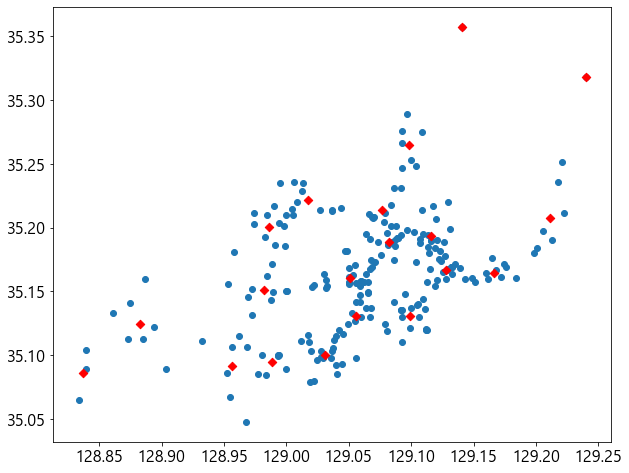

In [9]:
plt.figure()
plt.scatter(x=cctv_df['경도'], y=cctv_df['위도'])
plt.scatter(x=cctv_centers[:,0], y=cctv_centers[:,1], marker='D', c='r')
plt.show()

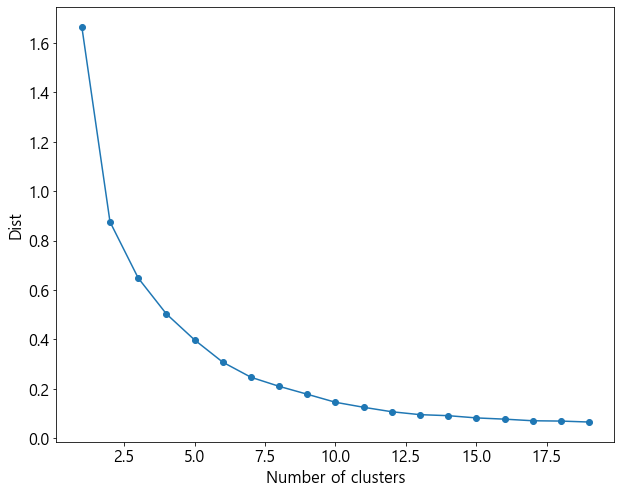

In [14]:
# 엘보 메서드
dist = []
for i in range(1,20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=50, max_iter=500,
        tol = 1e-04, random_state=0)
    km.fit(cctv)
    dist.append(km.inertia_)
    
# 시각화
plt.plot(range(1,20), dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dist')
plt.show()

---

In [56]:
import folium
map_osm = folium.Map(location=[cctv_df['위도'][0],cctv_df['경도'][0]], zoom_start=12)

# for i in range(0,len(original_df)):
#     lat = cctv_df['위도'][i]
#     lon = cctv_df['경도'][i]

#     folium.CircleMarker([lat,lon]).add_to(map_osm)
    
for i in range(0,len(cctv_centers)):
    lat = cctv_centers[i][1]
    lon = cctv_centers[i][0]

    folium.Marker([lat,lon],
                  popup = 'yellow carpet',
                   icon = folium.Icon(color='green')).add_to(map_osm)
    
map_osm

## CCTV_ MCLP 알고리즘

In [234]:
cctv_arr = np.empty((0,2), float)

In [235]:
# 2차원 배열 만들기
for i in range(0,len(cctv)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    cctv_arr = np.append(cctv_arr, np.array([[cctv['경도'][i],cctv['위도'][i]]]),axis=0)

----- Configurations -----
  Number of points 226
  K 20
  Radius 0.01
  M 100
----- Output -----
  Running time : 0.023001909255981445 seconds
  Optimal coverage points: 66


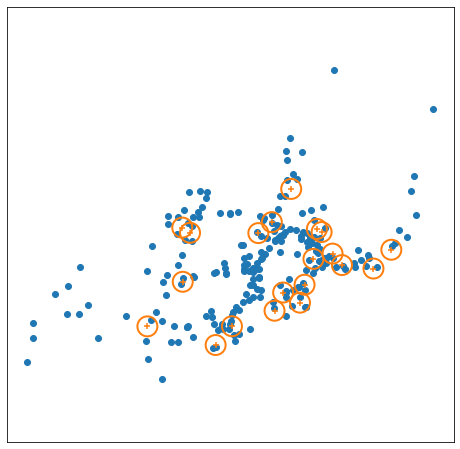

In [236]:
# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 100
# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(cctv_arr,K,radius,M)

# Plot the result
plot_result(cctv_arr,opt_sites,radius)

In [241]:
cctv_mclp = opt_sites
cctv_mclp[:5]

array([[128.99626046,  35.19410876],
       [129.0976193 ,  35.2380571 ],
       [129.11101095,  35.14207061],
       [129.03828479,  35.10050299],
       [128.98845186,  35.19933697]])

---

#  초등학교, 유치원 위치

In [94]:
school = pd.read_csv('./data/초등학교,유치원.csv',encoding='cp949')
school.head()

,NAME,위도,경도
0,감천초등학교,35.083096,129.007605
1,광일초등학교,35.103725,129.029861
2,괴정초등학교,35.103763,128.999875
3,구덕초등학교,35.120262,129.012359
4,구평초등학교,35.087007,128.989239


In [95]:
school = school.drop(['NAME'],axis=1)

In [101]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
school_kmeans = KMeans(n_clusters = 20, algorithm='auto')
school_kmeans.fit(school)

KMeans(n_clusters=20)

In [102]:
# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
school_df = school.copy()

school_df['target'] = school_kmeans.labels_

In [103]:
school_centers = school_kmeans.cluster_centers_
school_centers[:5]

array([[ 35.10317979, 129.01902519],
       [ 35.17217159, 129.17755027],
       [ 35.24008938, 129.01568455],
       [ 35.20549163, 129.10266134],
       [ 35.31772744, 129.25876917]])

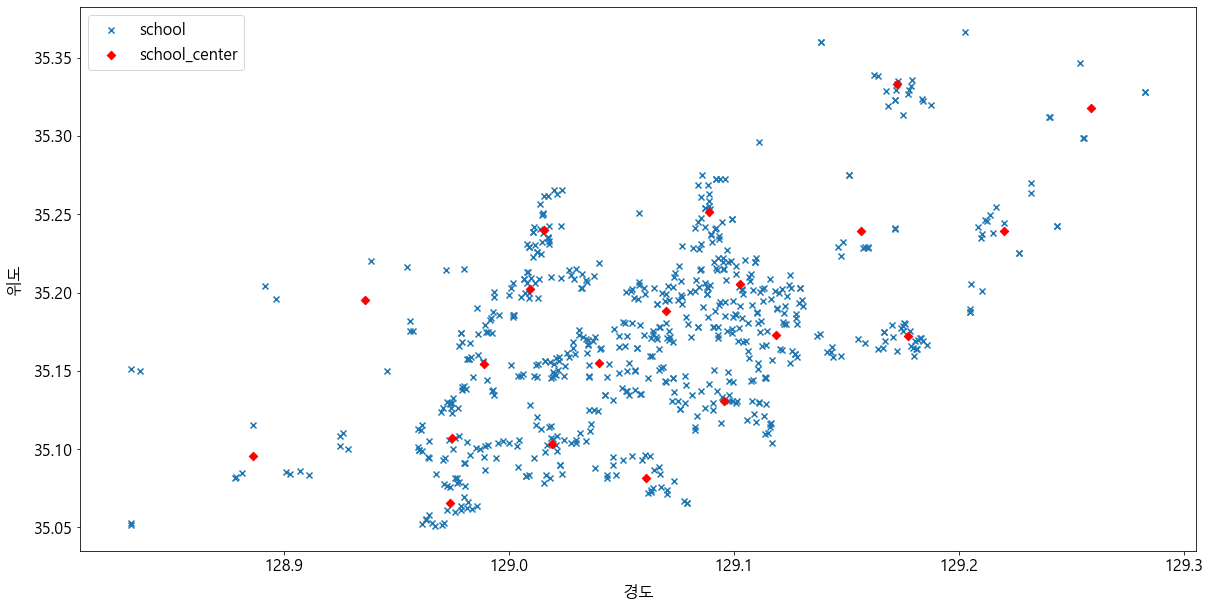

In [104]:
plt.figure(figsize=(20,10))
plt.scatter(x=school_df['경도'], y=school_df['위도'], marker='x', label='school')
plt.scatter(x=school_centers[:,1], y=school_centers[:,0], marker='D', c='r', label='school_center')


plt.xlabel('경도', labelpad=10)
plt.ylabel('위도', labelpad=10)

plt.legend()

plt.show()

In [106]:
# import folium
# map_osm = folium.Map(location=[original_df['위도'][0],original_df['경도'][0]], zoom_start=12)

# # for i in range(0,len(original_df)):
# #     lat = school_df['위도'][i]
# #     lon = school_df['경도'][i]

# #     folium.CircleMarker([lat,lon]).add_to(map_osm)
    
# for i in range(0,len(school_centers)):
#     lat = school_centers[i][0]
#     lon = school_centers[i][1]

#     folium.Marker([lat,lon],
#                   popup = 'yellow carpet',
#                    icon = folium.Icon(color='green')).add_to(map_osm)
    
# map_osm

## SCHOOL_ MCLP 알고리즘

In [230]:
school_mclp = []

----- Configurations -----
  Number of points 663
  K 20
  Radius 0.01
  M 1200
----- Output -----
  Running time : 0.1380319595336914 seconds
  Optimal coverage points: 277


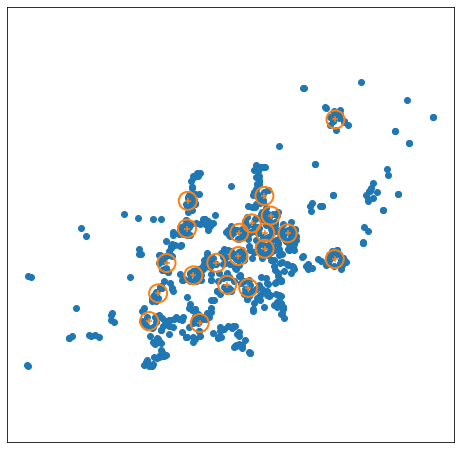

In [242]:
school_arr = np.empty((0,2), float)

# 2차원 배열 만들기
for i in range(0,len(school)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    school_arr = np.append(school_arr, np.array([[school['경도'][i],school['위도'][i]]]),axis=0)

# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 1200

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(school_arr,K,radius,M)

# Plot the result
plot_result(school_arr,opt_sites,radius)

In [243]:
school_mclp = opt_sites
school_mclp[:5]

array([[129.00915485,  35.20399003],
       [129.12102259,  35.19870578],
       [128.98638278,  35.16561944],
       [128.96710338,  35.10111018],
       [128.97703362,  35.13191486]])

---

# 공원

In [139]:
park = pd.read_csv('./data/공원.csv',encoding='cp949')
park.head()

,공원명,위도,경도
0,해관공원,35.039434,128.815936
1,가람공원,35.149874,128.820798
2,송정공원,35.099099,128.823388
3,숲길공원,35.147049,128.824841
4,신명공원(1호근린공원),35.147015,128.825419


In [140]:
park = park.drop(['공원명'],axis=1)

In [154]:
park

,위도,경도
0,35.039434,128.815936
1,35.149874,128.820798
2,35.099099,128.823388
3,35.147049,128.824841
4,35.147015,128.825419
...,...,...
622,35.310939,129.240520
623,35.314995,129.259516
624,35.293068,129.260125
625,35.333669,129.262749


In [141]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
park_kmeans = KMeans(n_clusters = 20, random_state=0, algorithm='auto')
park_kmeans.fit(park)

# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
park_df = park.copy()
park_df['target'] = park_kmeans.labels_

# 군집의 중앙값 추출
park_centers = park_kmeans.cluster_centers_
park_centers[:5]

array([[ 35.19465205, 129.06976158],
       [ 35.08951819, 128.89522486],
       [ 35.33236769, 129.25172683],
       [ 35.08815404, 129.01740075],
       [ 35.2406316 , 129.21510466]])

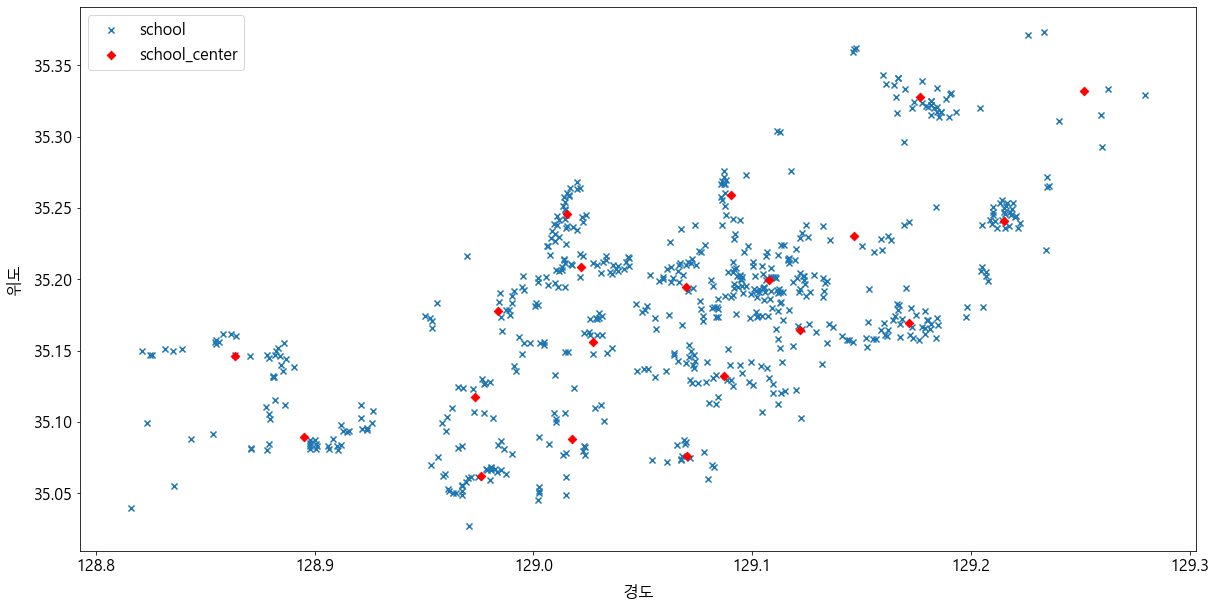

In [142]:
# 시각화

plt.figure(figsize=(20,10))
plt.scatter(x=park_df['경도'], y=park_df['위도'], marker='x', label='school')
plt.scatter(x=park_centers[:,1], y=park_centers[:,0], marker='D', c='r', label='school_center')


plt.xlabel('경도', labelpad=10)
plt.ylabel('위도', labelpad=10)

plt.legend()

plt.show()

In [143]:
# # 지도 표시
# import folium
# map_osm = folium.Map(location=[original_df['위도'][0],original_df['경도'][0]], zoom_start=12)

# # for i in range(0,len(original_df)):
# #     lat = school_df['위도'][i]
# #     lon = school_df['경도'][i]

# #     folium.CircleMarker([lat,lon]).add_to(map_osm)
    
# for i in range(0,len(school_centers)):
#     lat = school_centers[i][0]
#     lon = school_centers[i][1]

#     folium.Marker([lat,lon],
#                   popup = 'yellow carpet',
#                    icon = folium.Icon(color='green')).add_to(map_osm)
    
# map_osm

## MCLP 알고리즘

----- Configurations -----
  Number of points 627
  K 20
  Radius 0.01
  M 1000
----- Output -----
  Running time : 0.11973047256469727 seconds
  Optimal coverage points: 243


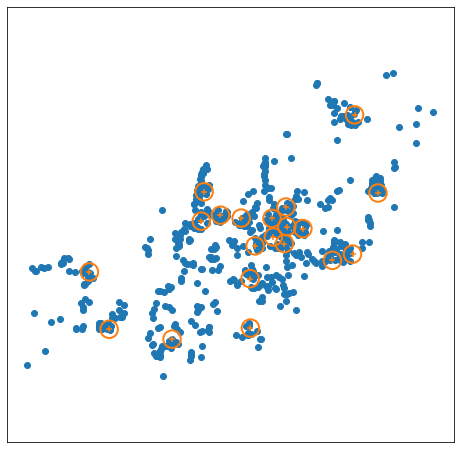

In [144]:
park_arr = np.empty((0,2), float)

# 2차원 배열 만들기
for i in range(0,len(park)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    park_arr = np.append(park_arr, np.array([[park['경도'][i],park['위도'][i]]]),axis=0)

# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 1000

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(park_arr,K,radius,M)

# Plot the result
plot_result(park_arr,opt_sites,radius)

---

# PC방

In [159]:
pc = pd.read_csv('./data/피시방.csv',encoding='cp949')
pc.head()

,pcroom_lot,위도,경도
0,장안읍 월내리 17-37,35.326627,129.279866
1,정관읍 방곡리 400-3,35.326336,129.188662
2,정관읍 매학리 713-6,35.321934,129.175646
3,정관읍 매학리 718-8,35.321365,129.175094
4,정관읍 매학리 718-4,35.321365,129.175094


In [160]:
pc = pc.drop(['pcroom_lot'],axis=1)

In [161]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
pc_kmeans = KMeans(n_clusters = 20, algorithm='auto')
pc_kmeans.fit(pc)

# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
pc_df = pc.copy()
pc_df['target'] = pc_kmeans.labels_

# 군집의 중앙값 추출
pc_centers = pc_kmeans.cluster_centers_
pc_centers[:5]

array([[ 35.19154867, 129.10859705],
       [ 35.1612066 , 128.98301913],
       [ 35.15491993, 129.05735477],
       [ 35.26628638, 129.08908588],
       [ 35.09843973, 129.02696167]])

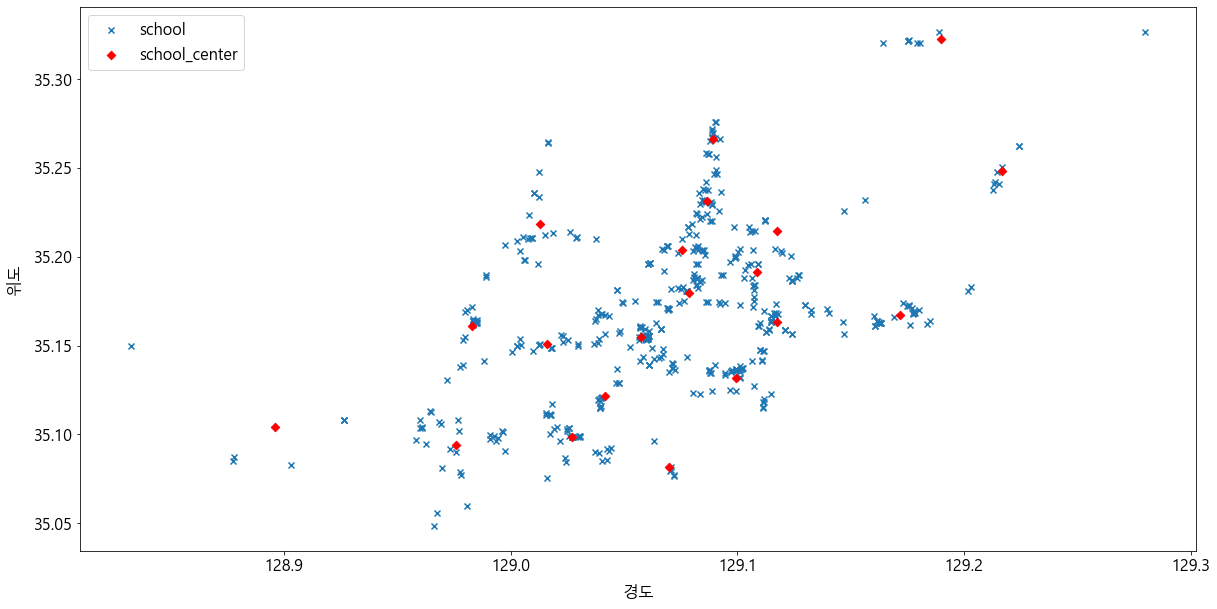

In [162]:
# 시각화

plt.figure(figsize=(20,10))
plt.scatter(x=pc_df['경도'], y=pc_df['위도'], marker='x', label='school')
plt.scatter(x=pc_centers[:,1], y=pc_centers[:,0], marker='D', c='r', label='school_center')


plt.xlabel('경도', labelpad=10)
plt.ylabel('위도', labelpad=10)

plt.legend()

plt.show()

In [129]:
# 지도 표시
# import folium
# map_osm = folium.Map(location=[original_df['위도'][0],original_df['경도'][0]], zoom_start=12)

# # for i in range(0,len(original_df)):
# #     lat = school_df['위도'][i]
# #     lon = school_df['경도'][i]

# #     folium.CircleMarker([lat,lon]).add_to(map_osm)
    
# for i in range(0,len(school_centers)):
#     lat = school_centers[i][0]
#     lon = school_centers[i][1]

#     folium.Marker([lat,lon],
#                   popup = 'yellow carpet',
#                    icon = folium.Icon(color='green')).add_to(map_osm)
    
# map_osm

## MCLP 알고리즘

----- Configurations -----
  Number of points 497
  K 20
  Radius 0.01
  M 1500
----- Output -----
  Running time : 0.1512758731842041 seconds
  Optimal coverage points: 317


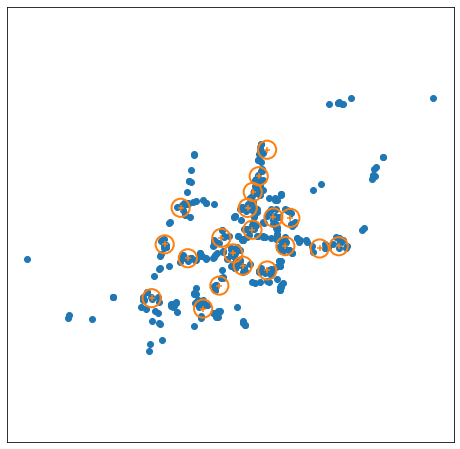

In [163]:
pc_arr = np.empty((0,2), float)

# 2차원 배열 만들기
for i in range(0,len(pc)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    pc_arr = np.append(pc_arr, np.array([[pc['경도'][i],pc['위도'][i]]]),axis=0)

# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 1500

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(pc_arr,K,radius,M)

# Plot the result
plot_result(pc_arr,opt_sites,radius)

---

# 학원

In [164]:
acad = pd.read_csv('./data/학원.csv',encoding='cp949')
acad.head()

,학원명,위도,경도
0,지사푸르넷학원,35.150415,128.832045
1,더배움영수굿모닝미술학원,35.149506,128.832611
2,삼성영어수학학원,35.150365,128.834072
3,온누리음악학원,35.151616,128.834269
4,웅진씽크빅학습센터지사학원,35.149570,128.834330


In [165]:
acad = acad.drop(['학원명'],axis=1)

In [166]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
acad_kmeans = KMeans(n_clusters = 20, random_state=0, algorithm='auto')
acad_kmeans.fit(acad)

# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
acad_df = acad.copy()
acad_df['target'] = acad_kmeans.labels_

# 군집의 중앙값 추출
acad_centers = acad_kmeans.cluster_centers_
acad_centers[:5]

array([[ 35.13423178, 129.0999504 ],
       [ 35.25066288, 129.08881737],
       [ 35.16154749, 128.98785449],
       [ 35.1701971 , 129.17420708],
       [ 35.15928093, 129.02907178]])

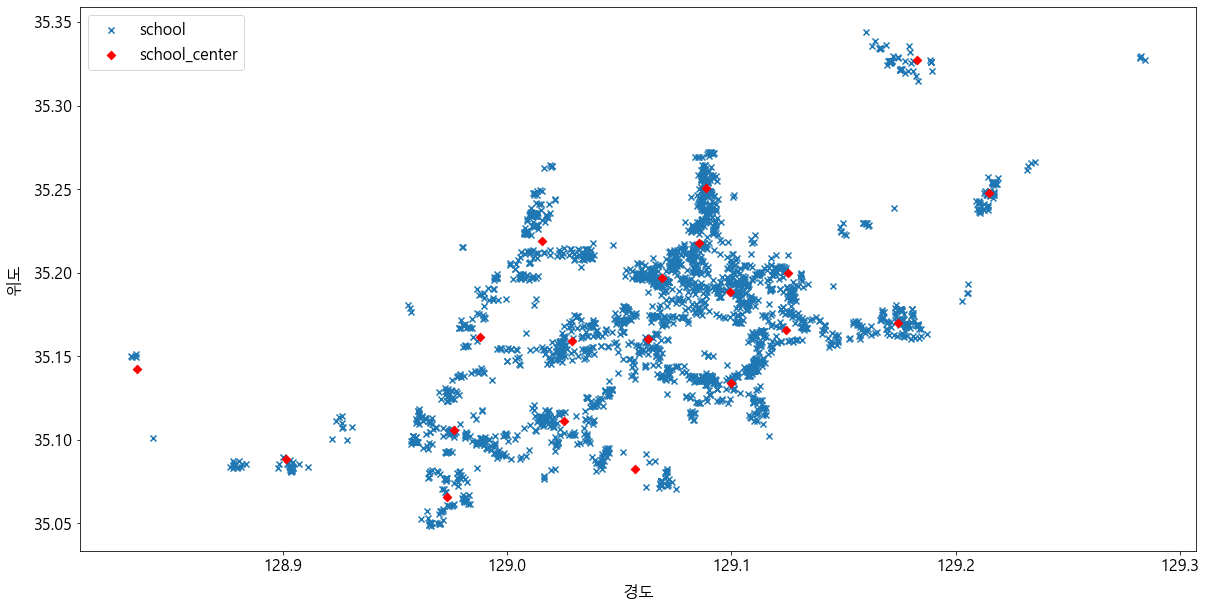

In [167]:
# 시각화

plt.figure(figsize=(20,10))
plt.scatter(x=acad_df['경도'], y=acad_df['위도'], marker='x', label='school')
plt.scatter(x=acad_centers[:,1], y=acad_centers[:,0], marker='D', c='r', label='school_center')


plt.xlabel('경도', labelpad=10)
plt.ylabel('위도', labelpad=10)

plt.legend()

plt.show()

## MCLP 알고리즘

In [175]:
len(acad_arr)

2653

In [205]:
acad_arr = np.empty((0,2), float)

# 2차원 배열 만들기
for i in range(0,len(acad)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    acad_arr = np.append(acad_arr, np.array([[acad['경도'][i],acad['위도'][i]]]),axis=0)

# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 500

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(acad_arr,K,radius,M)

# Plot the result
plot_result(acad_arr,opt_sites,radius)

----- Configurations -----
  Number of points 2653
  K 20
  Radius 0.01
  M 500


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

---

## 놀이터

In [178]:
play = pd.read_csv('./data/놀이터.csv',encoding='cp949')
play.head()

,주소2,위도,경도
0,부산광역시 부산진구 양정동 91-2,35.174399,129.077487
1,부산광역시 강서구 공항로15번길 28 (명지동)C4블럭 부산 강서구 명지동 1692...,35.100018,128.919299
2,부산광역시 강서구 공항로15번길 28 (명지동)부산 강서구 명지동 1692-1번지 ...,35.112189,128.931058
3,부산광역시 강서구 공항로361번길 26 (대저2동),35.140727,128.947339
4,부산광역시 강서구 공항진입로42번길 20 (대저2동),35.183252,128.952584


In [179]:
play = play.drop(['주소2'],axis=1)

In [182]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
play_kmeans = KMeans(n_clusters = 20, random_state=0, algorithm='auto')
play_kmeans.fit(play)

# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
play_df = play.copy()
play_df['target'] = play_kmeans.labels_

# 군집의 중앙값 추출
play_centers = play_kmeans.cluster_centers_
play_centers[:5]

array([[ 35.24009955, 129.21229673],
       [ 35.15991873, 129.0326121 ],
       [ 35.14114656, 128.98564647],
       [ 35.24172797, 129.08890927],
       [ 35.16591538, 129.12635823]])

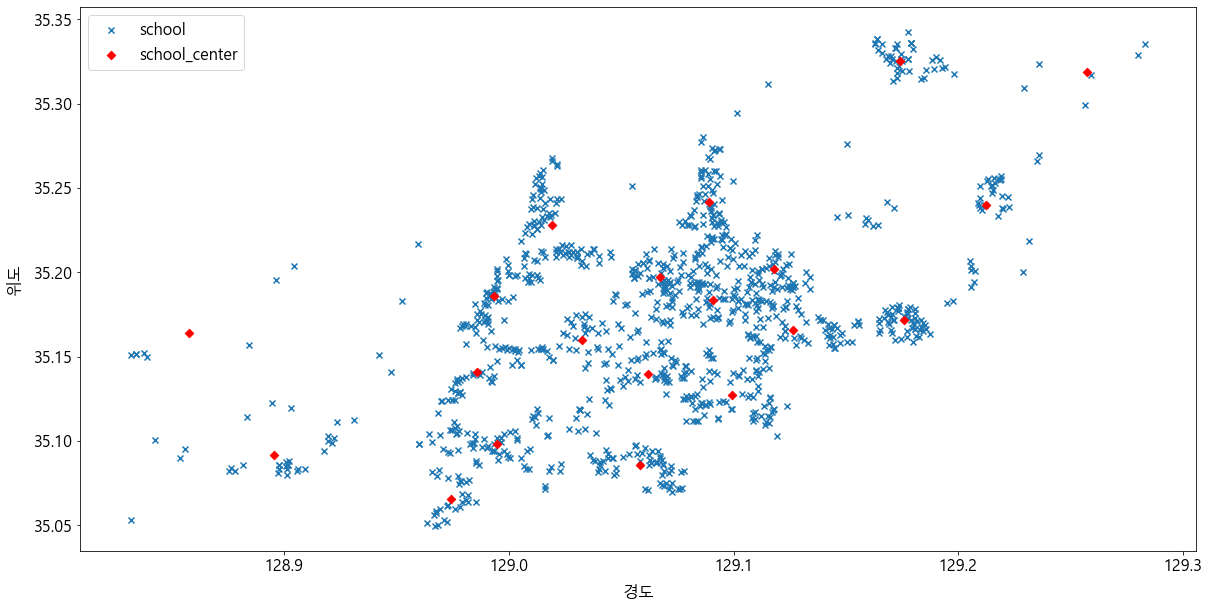

In [183]:
# 시각화

plt.figure(figsize=(20,10))
plt.scatter(x=play_df['경도'], y=play_df['위도'], marker='x', label='school')
plt.scatter(x=play_centers[:,1], y=play_centers[:,0], marker='D', c='r', label='school_center')


plt.xlabel('경도', labelpad=10)
plt.ylabel('위도', labelpad=10)

plt.legend()

plt.show()

## MCLP 알고리즘

----- Configurations -----
  Number of points 1135
  K 20
  Radius 0.01
  M 700
----- Output -----
  Running time : 0.11212420463562012 seconds
  Optimal coverage points: 450


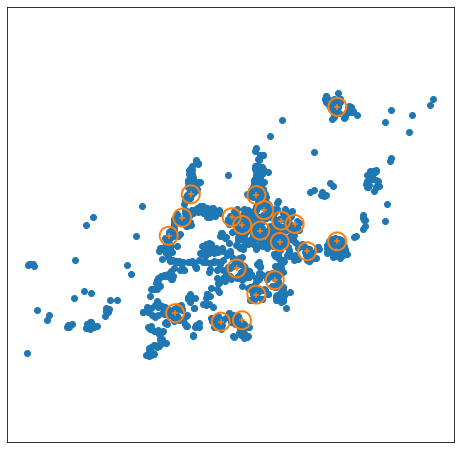

In [190]:
play_arr = np.empty((0,2), float)

# 2차원 배열 만들기
for i in range(0,len(play)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    play_arr = np.append(play_arr, np.array([[play['경도'][i],play['위도'][i]]]),axis=0)

# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 700

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(play_arr,K,radius,M)

# Plot the result
plot_result(play_arr,opt_sites,radius)

---

## 교회

In [220]:
church = pd.read_csv('./data/교회.csv',encoding='cp949')
church.head()

,church_lot,위도,경도
0,장안읍 길천리 381,35.333325,129.281008
1,정관읍 용수리 31-1,35.330537,129.183603
2,장안읍 월내리 259-2,35.328655,129.279178
3,정관읍 용수리 884-1,35.324926,129.166317
4,정관읍 매학리 397-3,35.321494,129.168859


In [221]:
church = church.drop(['church_lot'],axis=1)

In [222]:
# 군집화 (n_clusters = 옐로우카펫 설치 갯수)
church_kmeans = KMeans(n_clusters = 20, random_state=0, algorithm='auto')
church_kmeans.fit(church)

# 진짜 결과와 예측 결과를 가진 데이터 프레임을 각각 생성
church_df = church.copy()
church_df['target'] = church_kmeans.labels_

# 군집의 중앙값 추출
church_centers = church_kmeans.cluster_centers_
church_centers[:5]

array([[ 35.19453998, 129.11279407],
       [ 35.10190135, 129.02342704],
       [ 35.22227003, 129.00926217],
       [ 35.14925984, 129.05014246],
       [ 35.23336784, 129.15639553]])

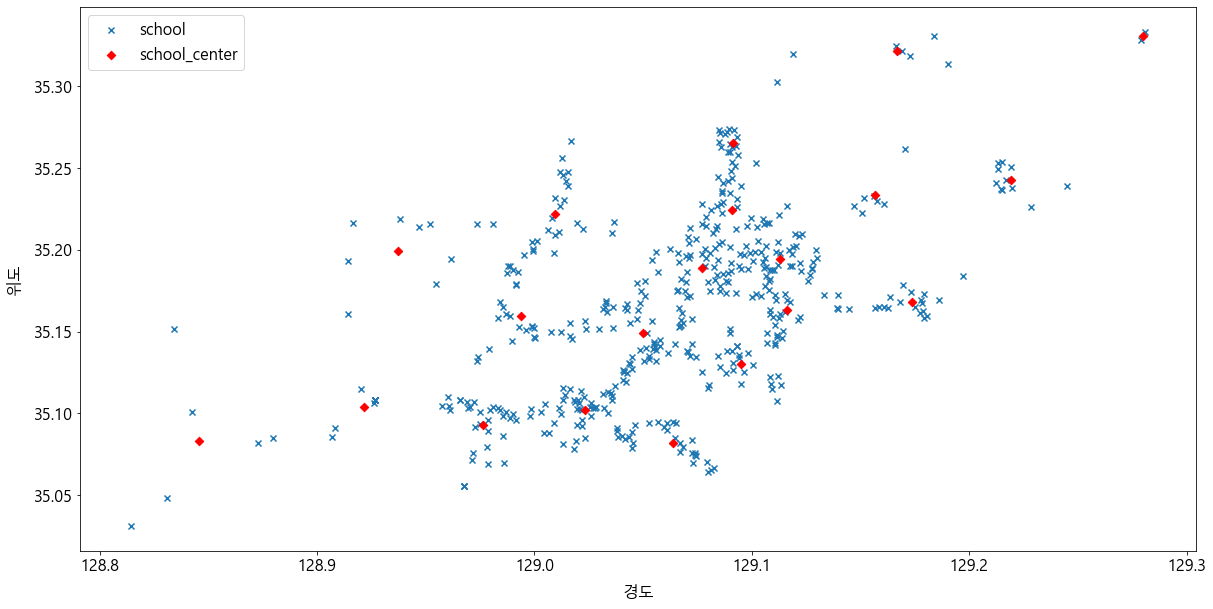

In [223]:
# 시각화

plt.figure(figsize=(20,10))
plt.scatter(x=church_df['경도'], y=church_df['위도'], marker='x', label='school')
plt.scatter(x=church_centers[:,1], y=church_centers[:,0], marker='D', c='r', label='school_center')


plt.xlabel('경도', labelpad=10)
plt.ylabel('위도', labelpad=10)

plt.legend()

plt.show()

## MCLP 알고리즘

----- Configurations -----
  Number of points 489
  K 20
  Radius 0.01
  M 700
----- Output -----
  Running time : 0.08433032035827637 seconds
  Optimal coverage points: 218


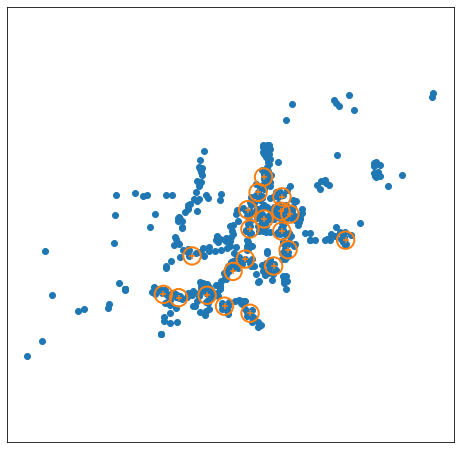

In [224]:
church_arr = np.empty((0,2), float)

# 2차원 배열 만들기
for i in range(0,len(church)):
    # arr = np.array([[cctv['경도'][i],cctv['위도'][i]]])
    church_arr = np.append(church_arr, np.array([[church['경도'][i],church['위도'][i]]]),axis=0)

# Number of sites to select
K = 20

# Service radius of each site
radius = 0.01

# Candidate site size (random sites generated)
# 한 동그라미에 많이 들어감 (가중치가 높은 변수는 큰 값을 가짐)
M = 700

# Run mclp opt_sites is the location of optimal sites and f is the points covered
opt_sites,f = mclp(church_arr,K,radius,M)

# Plot the result
plot_result(church_arr,opt_sites,radius)